In [13]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from astropy.io import fits
import petitRADTRANS.retrieval.plot_style as ps

species v0.6.0
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Configuration settings:
   - Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
   - Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03
Using pRT Plotting style!


In [21]:
data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/"
files = ["HR8799e_SPHEREYJH_KLIP_spectrum.fits","HR8799e_SPHEREYJH_KLIP_2023_spectrum.fits","PACO_FLASSEUR_HR8799e_2016.txt","HR8799e_SPHERE_2016.dat"]
labels = ["KLIP Old","KLIP New", "Flasseur 2020", "Zurlo 2016"]

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


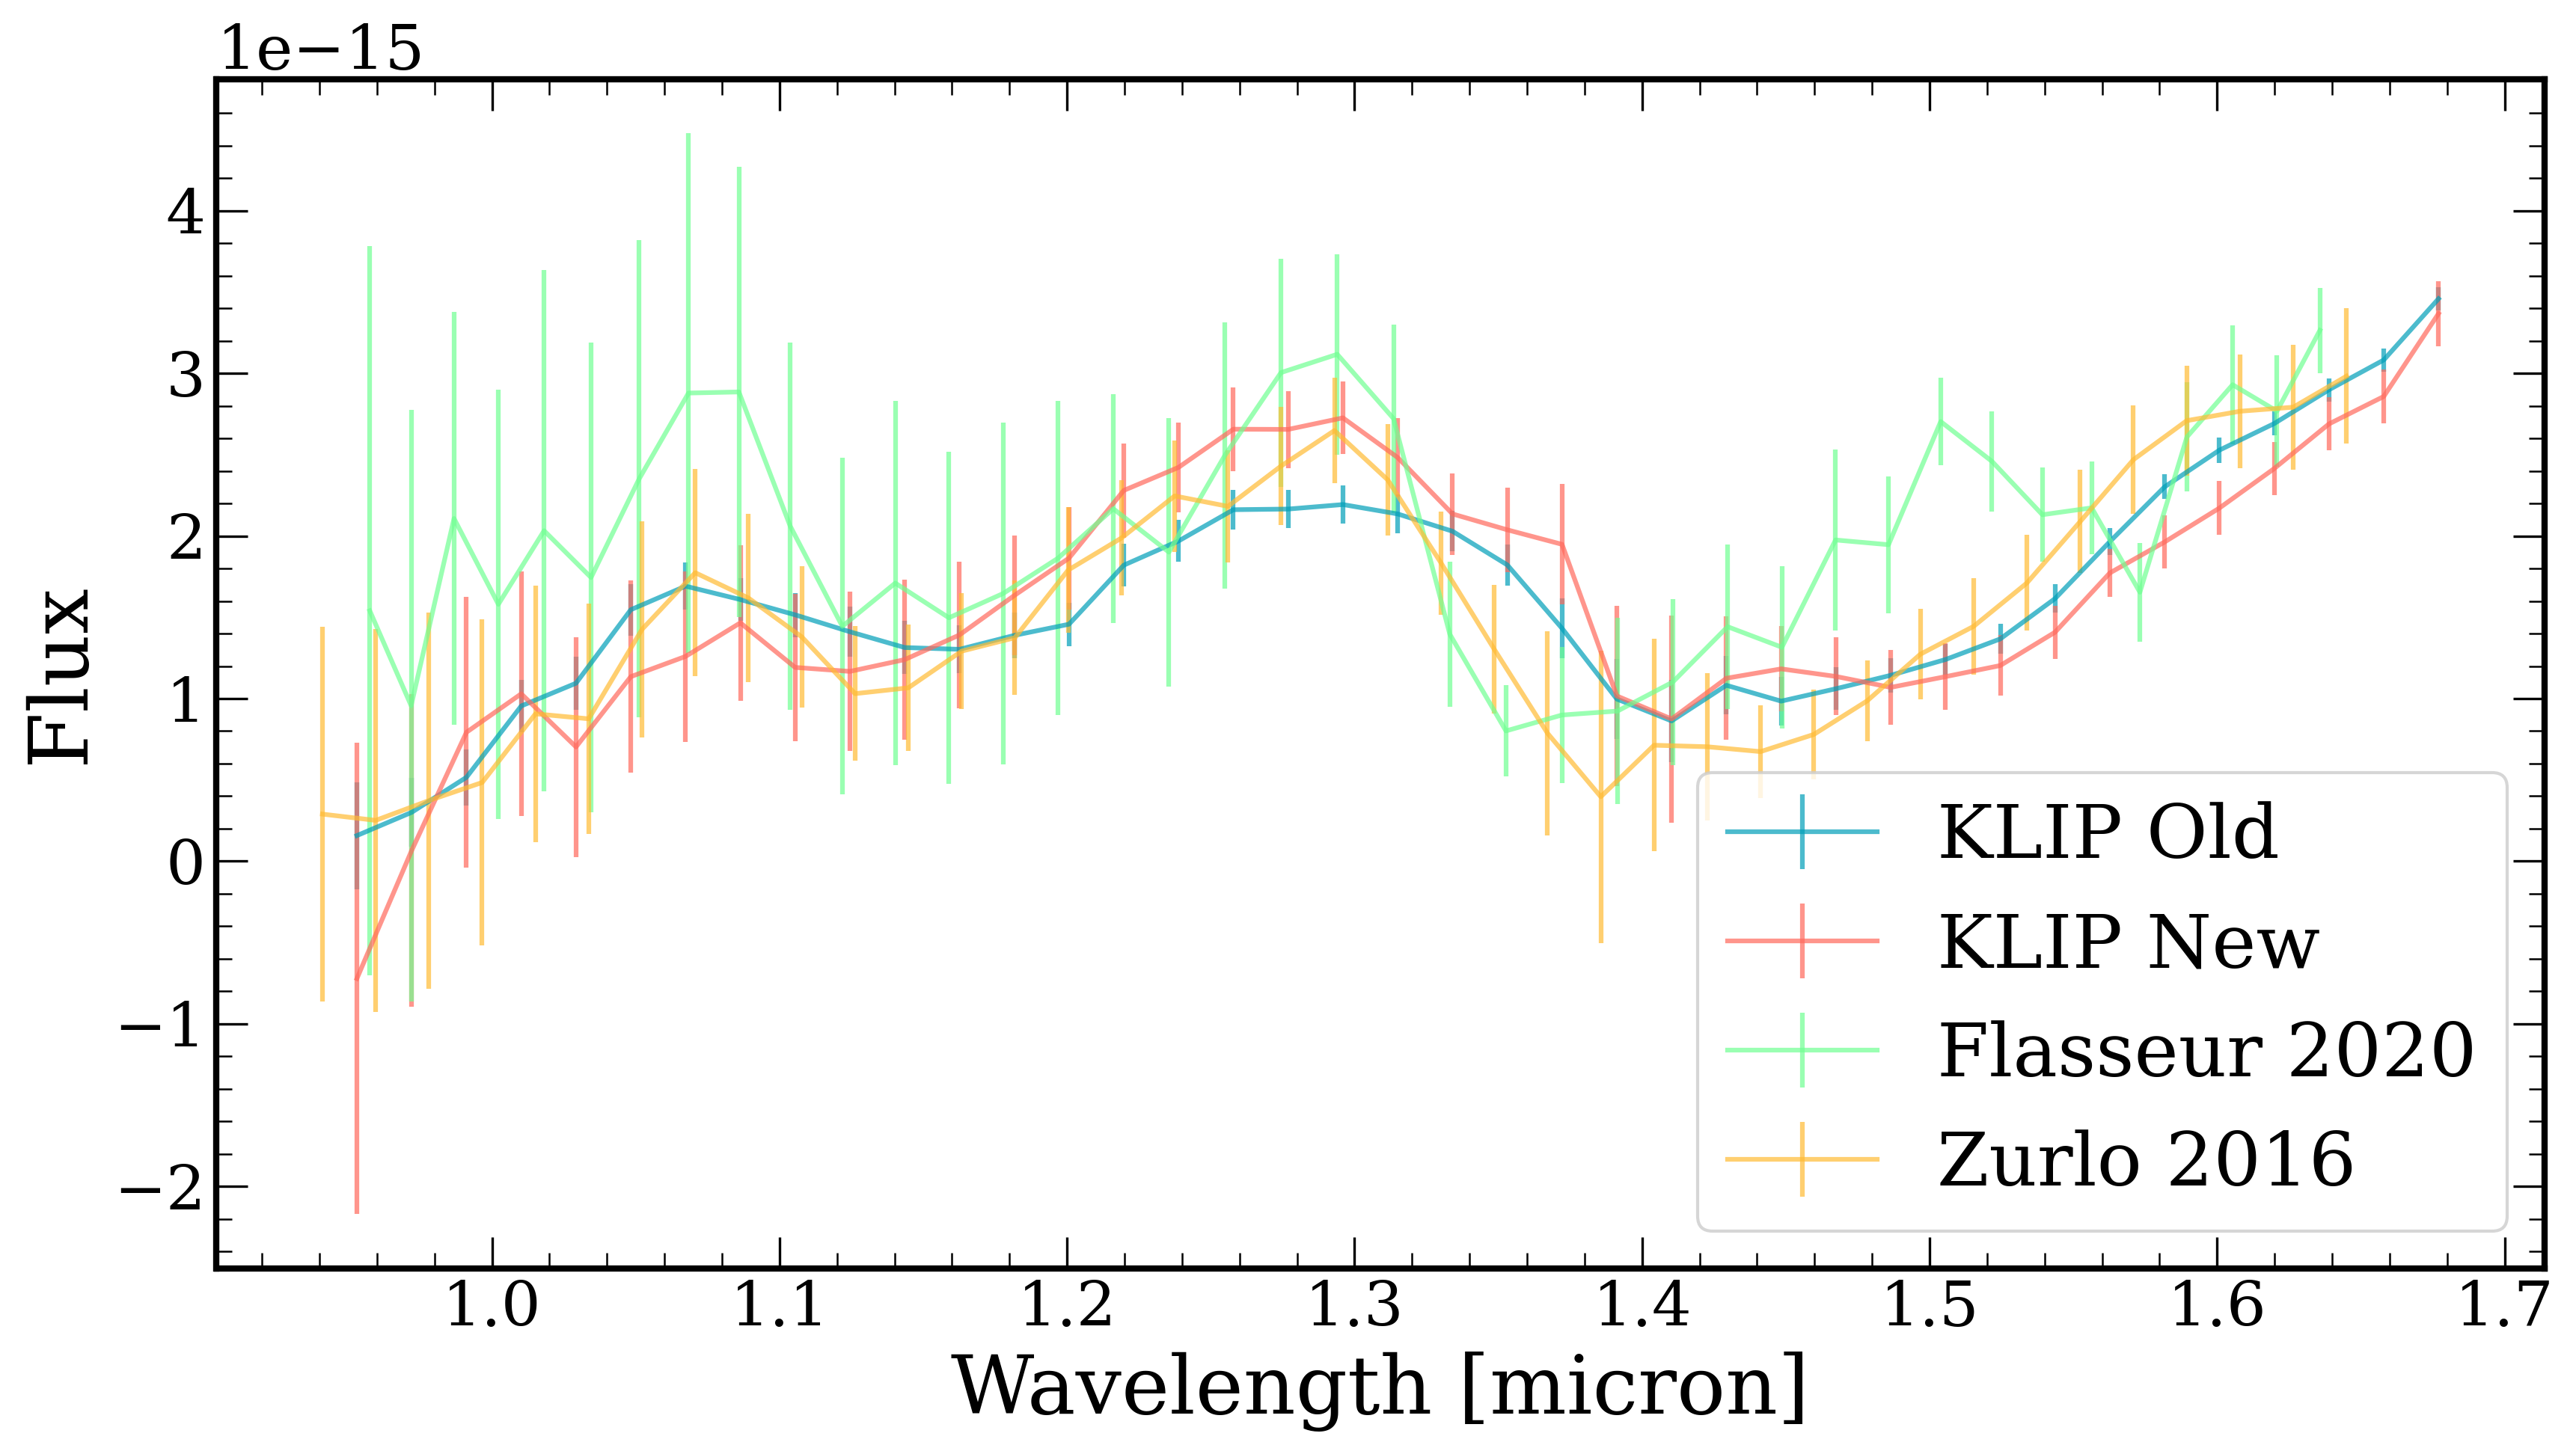

In [23]:
fig, ax = plt.subplots(figsize = (12,7))
for i,f in enumerate(files):
    if f.endswith(".fits"):
        spec = fits.open(data_dir + f)["SPECTRUM"].data
        wlen = spec["WAVELENGTH"]
        flux = spec["FLUX"]
        err = np.sqrt(np.diag(spec["COVARIANCE"]))
    else:
        if "PACO" in f:
            wlen,flux,err = np.loadtxt(data_dir + f,unpack=True)
        else:
            wlen,flux,err = np.loadtxt(data_dir + f,unpack=True,delimiter = ',')
    ax.errorbar(wlen,flux,yerr=err,label = labels[i],alpha = 0.7)
ax.legend()
ax.set_xlabel("Wavelength [micron]")
ax.set_ylabel("Flux")
plt.savefig("plots/SPHERE_DataComp_2023.pdf",bbox_inches = 'tight')

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Flux')

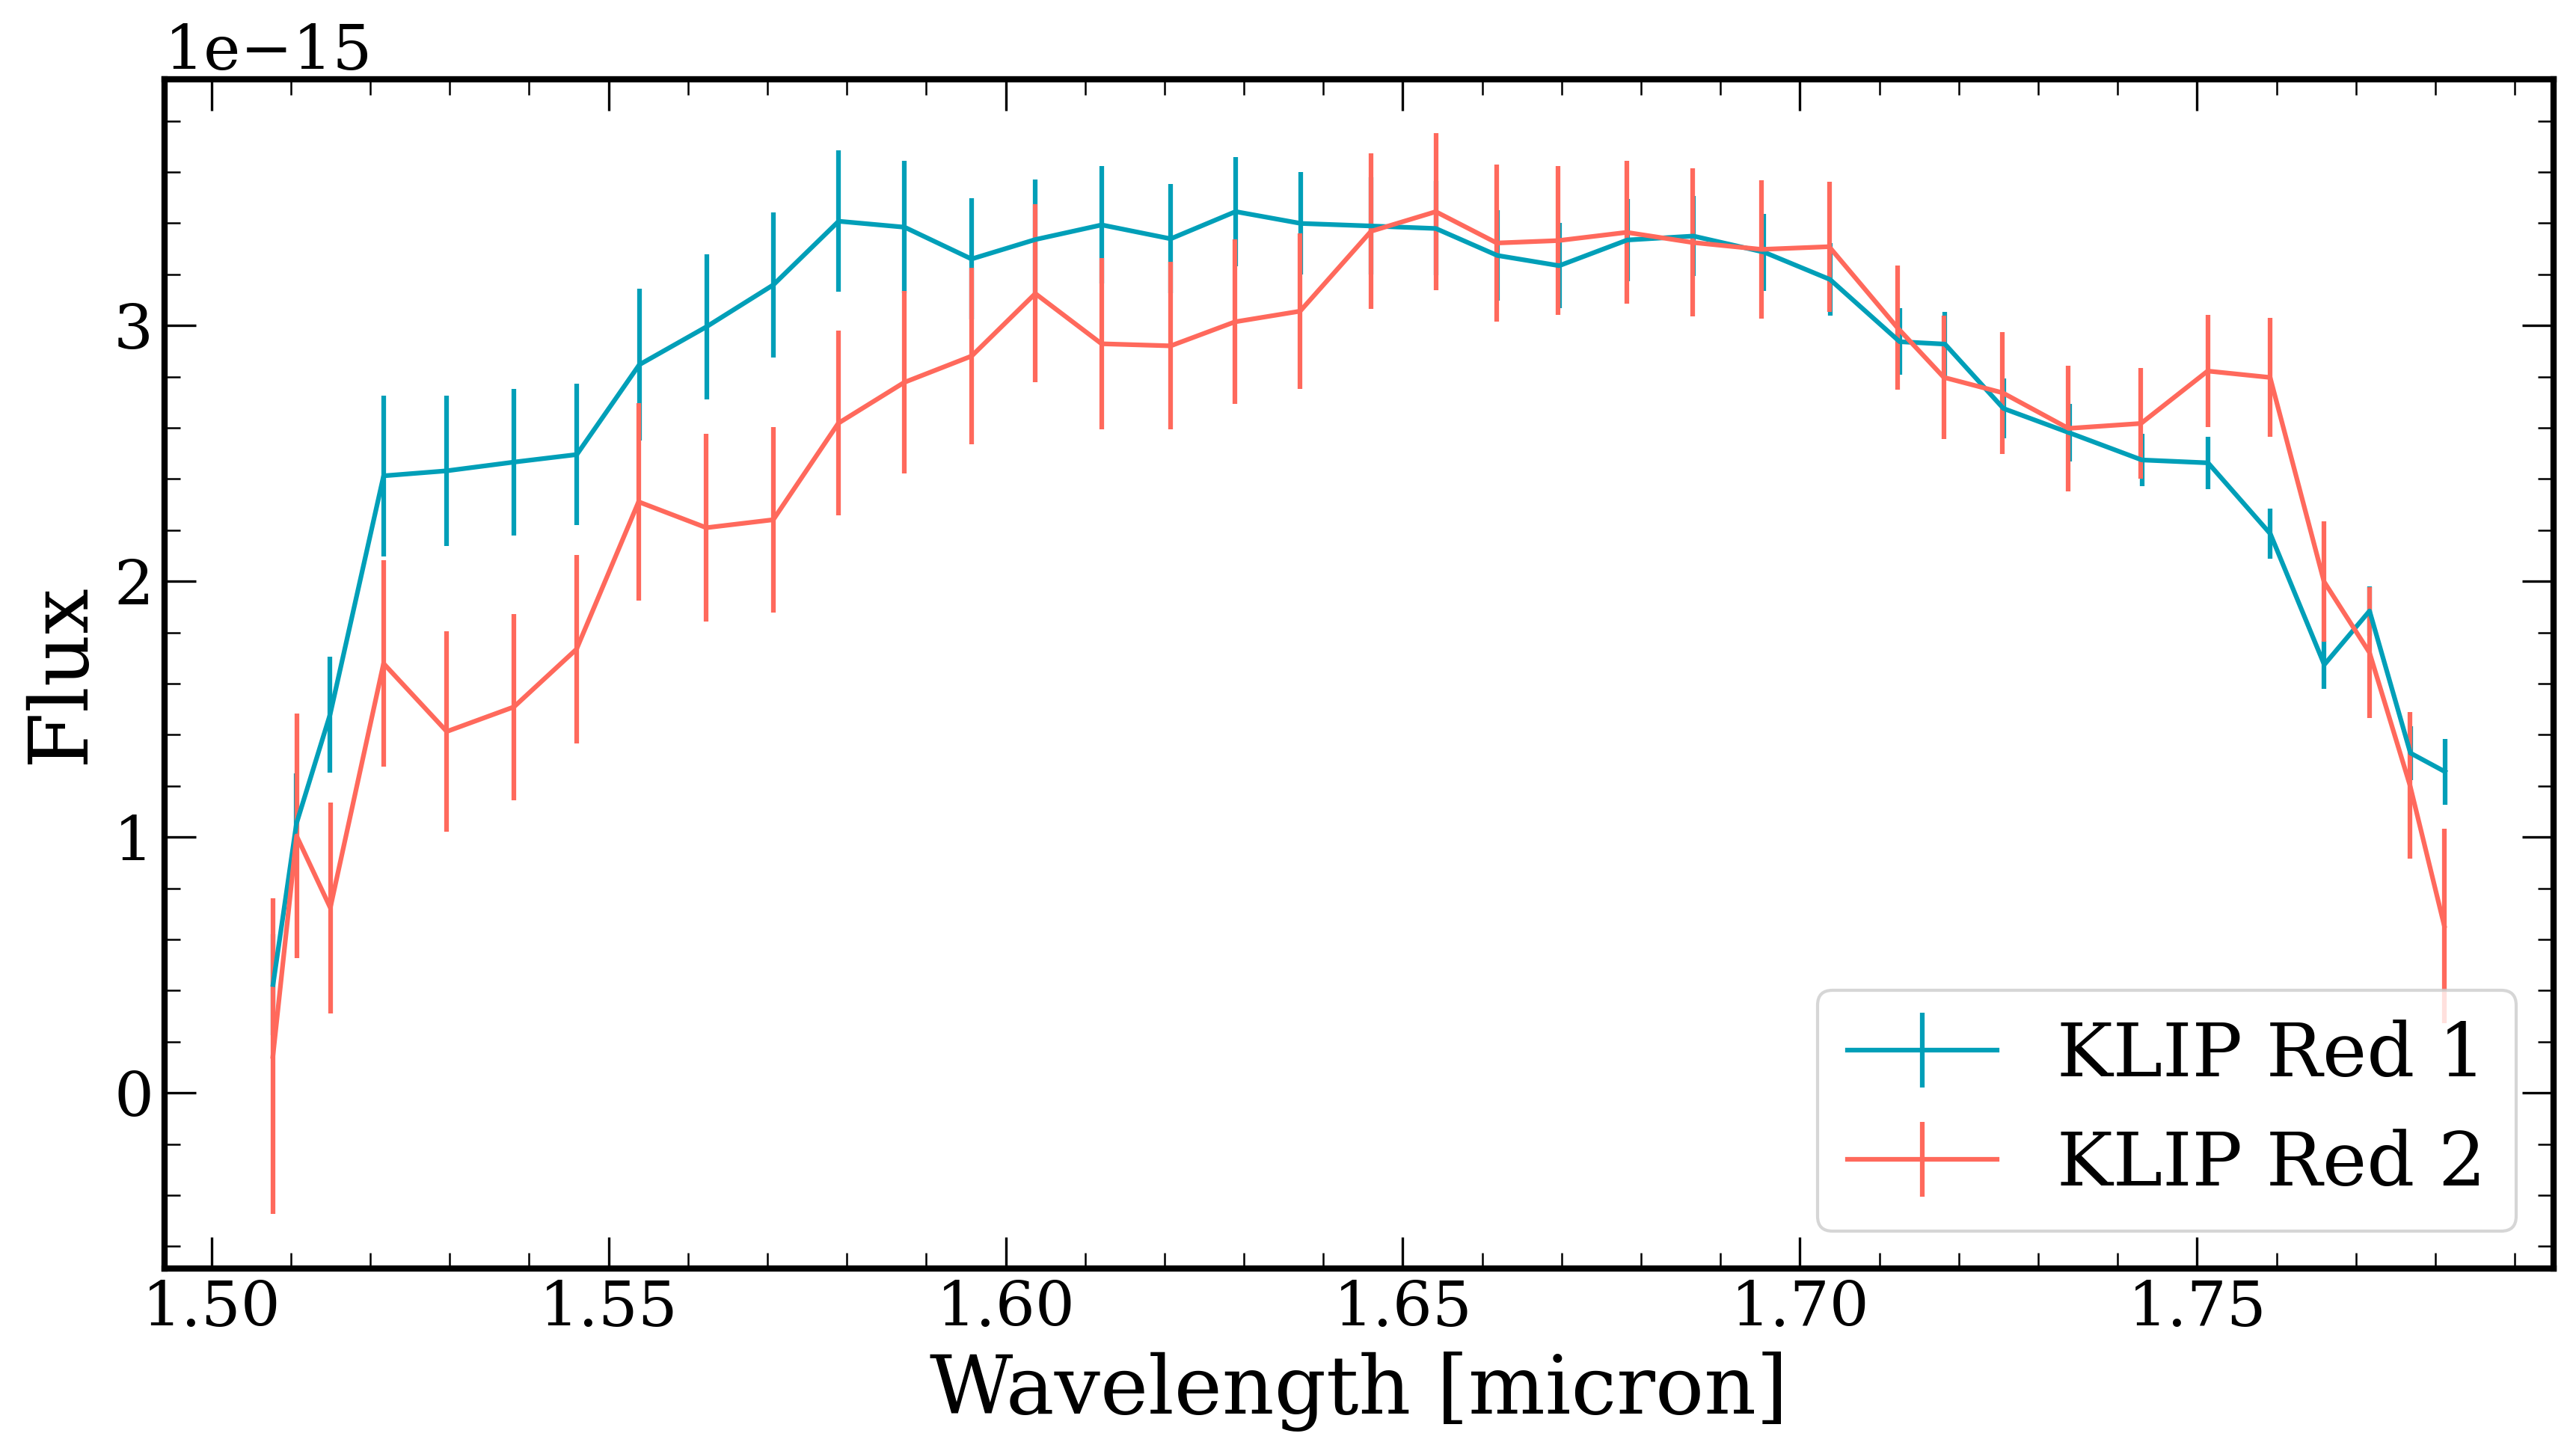

In [17]:
data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/"
files = ["HR8799e_GPIH_KLIP_spectrum.fits","HR8799e_GPIH_KLIP_2023_spectrum.fits"]#,"PACO_FLASSEUR_HR8799e_2016.txt","HR8799e_SPHERE_2016.dat"]
labels = ["KLIP Red 1","KLIP Red 2"]
fig, ax = plt.subplots(figsize = (12,7))
for i,f in enumerate(files):
    if f.endswith(".fits"):
        spec = fits.open(data_dir + f)["SPECTRUM"].data
        wlen = spec["WAVELENGTH"]
        flux = spec["FLUX"]
        err = np.sqrt(np.diag(spec["COVARIANCE"]))
    else:
        if "PACO" in f:
            wlen,flux,err = np.loadtxt(data_dir + f,unpack=True)
        else:
            wlen,flux,err = np.loadtxt(data_dir + f,unpack=True,delimiter = ',')
    ax.errorbar(wlen,flux,yerr=err,label = labels[i])
ax.legend()
ax.set_xlabel("Wavelength [micron]")
ax.set_ylabel("Flux")